# Titanic survival prediction

In [107]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [108]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
both = [train_df, test_df]

In [109]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [110]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
print(str(len(train_df.index)))

891


# Eploratory data analysis
** in this section you will see the way to get important information from the data with the help of visualiztions.**

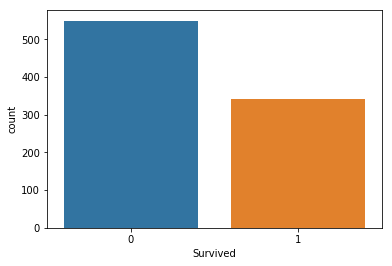

In [112]:
sns.countplot(x="Survived", data=train_df)

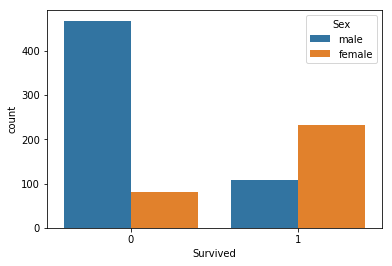

In [113]:
sns.countplot(x="Survived", hue="Sex", data=train_df)
# As shown in plot Females are more than the Males who survived

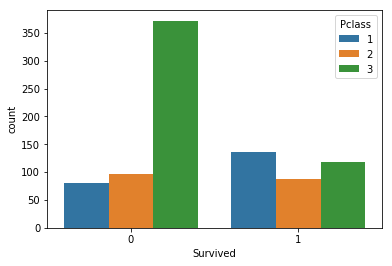

In [114]:
sns.countplot(x="Survived", hue="Pclass", data=train_df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025DB97A0E48>]],
      dtype=object)

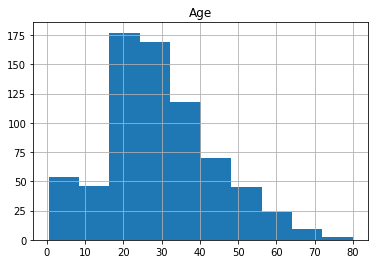

In [115]:
train_df.hist(column="Age")

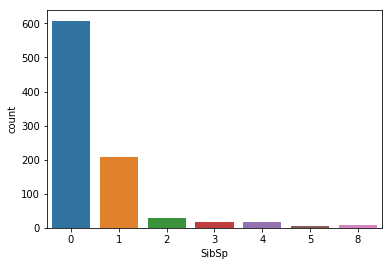

In [116]:
sns.countplot(x='SibSp', data=train_df)

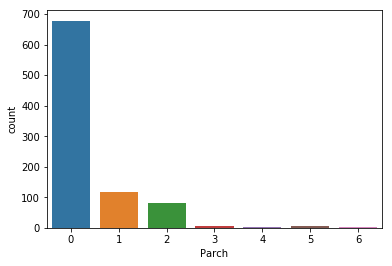

In [117]:
sns.countplot(x='Parch', data=train_df)

# Data Wrangling

In [118]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [119]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Visualizing NaNs
**using Heatmaps**

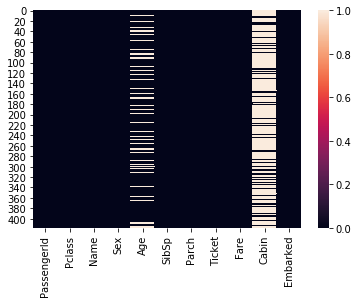

In [120]:
sns.heatmap(data=test_df.isnull())

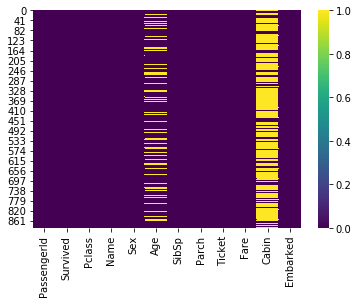

In [121]:
sns.heatmap(data=train_df.isnull(), cmap='viridis')

# processing Age column
**showing boxplot to find median ages according to Pessanger class**

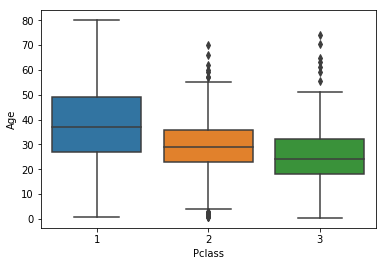

In [122]:
sns.boxplot(x='Pclass', y='Age', data=train_df)

# Processing NaNs

In [123]:
def processing_age(cols):
    Age= cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age
train_df['Age'] = train_df[['Age', 'Pclass']].apply(processing_age, axis=1)

In [124]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### dropping Cabin column

In [125]:
train_df.drop('Cabin', axis=1, inplace=True)

# Filling


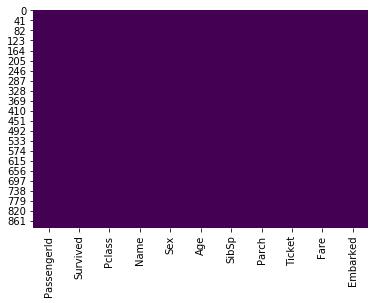

In [126]:
medianage = train_df['Age'].median()
train_df['Age'].fillna(value=medianage, axis=0, inplace=True)
train_df['Age'].fillna(method = "bfill", axis=0, inplace=True)

sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')

In [127]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [128]:
test_df['Age'] = test_df[['Age', 'Pclass']].apply(processing_age, axis=1)
test_df.drop('Cabin', axis=1, inplace=True)
final = test_df

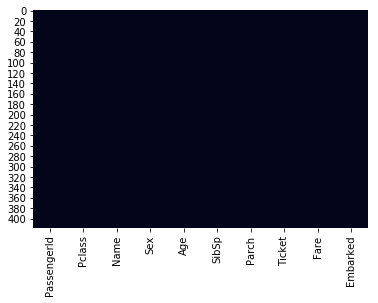

In [129]:
sns.heatmap(test_df.isnull(), cbar=False)

In [130]:
train_df.isnull().sum()
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

# Creating Dummy Varibles for categorical data

In [131]:
pclass = pd.get_dummies(train_df['Pclass'], drop_first=True)

In [132]:
sex = pd.get_dummies(train_df['Sex'], drop_first=True)

In [133]:
embark = pd.get_dummies(train_df['Embarked'], drop_first=True)

In [134]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [135]:
train_df = pd.concat([train_df, embark, sex, pclass], axis=1)

In [136]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
Q              891 non-null uint8
S              891 non-null uint8
male           891 non-null uint8
2              891 non-null uint8
3              891 non-null uint8
dtypes: float64(2), int64(5), object(4), uint8(5)
memory usage: 81.0+ KB


In [137]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S,male,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1,0,1


In [138]:
pclass = pd.get_dummies(test_df['Pclass'], drop_first=True)
sex = pd.get_dummies(test_df['Sex'], drop_first=True)
embark = pd.get_dummies(test_df['Embarked'], drop_first=True)
test_df = pd.concat([test_df, embark, sex, pclass], axis=1)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S,male,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,0,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,0,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,1,0,0,1


# preparing Data

In [139]:
train_df.drop(['Pclass', 'Embarked', 'PassengerId','Ticket', 'Name', 'Sex', 'Fare'], axis=1, inplace=True)

In [141]:
train_df.head()

,Survived,Age,SibSp,Parch,Q,S,male,2,3
0,0,22.0,1,0,0,1,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,1,0,0,1
3,1,35.0,1,0,0,1,0,0,0
4,0,35.0,0,0,0,1,1,0,1


In [142]:
test_df.drop(['Pclass', 'Embarked', 'PassengerId', 'Ticket','Name', 'Sex', 'Fare'], axis=1, inplace=True)

In [143]:
test_df.head()

,Age,SibSp,Parch,Q,S,male,2,3
0,34.5,0,0,1,0,1,0,1
1,47.0,1,0,0,1,0,0,1
2,62.0,0,0,1,0,1,1,0
3,27.0,0,0,0,1,1,0,1
4,22.0,1,1,0,1,0,0,1


# Training data

In [144]:
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Random Forest

In [155]:
from sklearn.ensemble import RandomForestClassifier

rand_forest_clf = RandomForestClassifier().fit(X_train, y_train)
rand_forest_predict = rand_forest_clf.predict(X_test)

print("Acc on train data:", rand_forest_clf.score(X_train, y_train))
print("Acc on test data:", rand_forest_clf.score(X_test, y_test))

Acc on train data: 0.925561797752809
Acc on test data: 0.8156424581005587


In [168]:
prediction_rf = rand_forest_clf.predict(test_df)
print(confusion_matrix(y_test, rand_forest_predict))
print(classification_report(y_test, rand_forest_predict))

[[96 14]
 [19 50]]
             precision    recall  f1-score   support

          0       0.83      0.87      0.85       110
          1       0.78      0.72      0.75        69

avg / total       0.81      0.82      0.81       179



# Logistic regression

In [159]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(X_train, y_train)
survived = reg.predict(X_test)


print("Acc on train data:", reg.score(X_train, y_train))
print("Acc on test data:", reg.score(X_test, y_test))

Acc on train data: 0.8103932584269663
Acc on test data: 0.7932960893854749


In [167]:
prediction_reg = reg.predict(test_df)
print(confusion_matrix(y_test, survived))
print(classification_report(y_test, survived))

[[94 16]
 [21 48]]
             precision    recall  f1-score   support

          0       0.82      0.85      0.84       110
          1       0.75      0.70      0.72        69

avg / total       0.79      0.79      0.79       179



# K Nearest Neighbours

In [161]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
survivedknn = knn.predict(X_test)

print("Acc on train data:", knn.score(X_train, y_train))
print("Acc on test data:", knn.score(X_test, y_test))

Acc on train data: 0.8455056179775281
Acc on test data: 0.7932960893854749


In [166]:
prediction_knn = knn.predict(test_df)
print(confusion_matrix(y_test, survivedknn))
print(classification_report(y_test, survivedknn))

[[101   9]
 [ 28  41]]
             precision    recall  f1-score   support

          0       0.78      0.92      0.85       110
          1       0.82      0.59      0.69        69

avg / total       0.80      0.79      0.79       179



# Support vector classifier


In [177]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC()
svc.fit(X_train, y_train)
survivedsvc = knn.predict(X_test)

print("Acc on train data:", svc.score(X_train, y_train))
print("Acc on test data:", svc.score(X_test, y_test))

Acc on train data: 0.8441011235955056
Acc on test data: 0.7988826815642458


In [165]:
predsvc = knn.predict(test_df)
print(confusion_matrix(y_test, survivedsvc))
print(classification_report(y_test, survivedsvc))

[[101   9]
 [ 28  41]]
             precision    recall  f1-score   support

          0       0.78      0.92      0.85       110
          1       0.82      0.59      0.69        69

avg / total       0.80      0.79      0.79       179



**Tuning the parameters for SVC**

In [170]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1, 1, 10, 100], 'gamma':[ 1,0.1, 0.001, 0.0001]}
grid = GridSearchCV(SVC(), param_grid, verbose=2)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [173]:
print(grid.best_params_)
print(grid.best_estimator_)
acc_score = grid.best_score_
print(grid.best_score_)
grid_pred = grid.predict(X_test)
print(confusion_matrix(y_test, gridpred))
print(classification_report(y_test, gridpred))

{'C': 100, 'gamma': 0.001}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.8132022471910112
[[95 15]
 [18 51]]
             precision    recall  f1-score   support

          0       0.84      0.86      0.85       110
          1       0.77      0.74      0.76        69

avg / total       0.81      0.82      0.81       179

